### Importações e Configurações

In [5]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
# Caminho para Salvar a Imagem

path_img = './outputs/plots/'

### Carregando os Dados

In [7]:
# Train.csv

df_train_raw = pd.read_csv('../../data/raw/train.csv', delimiter=',')
df_train_raw.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
df_train_raw.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [10]:
# Stores.csv

df_stores_raw = pd.read_csv('../../data/raw/stores.csv', delimiter=',')
df_stores_raw.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
df_stores_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [12]:
df_stores_raw.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [13]:
# Features.csv

df_features_raw = pd.read_csv('../../data/raw/features.csv', delimiter=',')
df_features_raw.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [14]:
df_features_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [15]:
df_features_raw.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Nesta etapa foi feita apenas a leitura inicial dos arquivos para entender a estrutura geral dos dados. A separação entre vendas, características das lojas e variáveis externas já indica que será necessário um processo de merge antes da modelagem, o que será tratado nas próximas etapas do projeto.

### Conversão Colunas do Tipo Data

In [16]:
def convert_date(df):
    date_cols = []
    for col in df.columns:
        if col.lower().startswith('date') and df[col].notna().any():
            converted = pd.to_datetime(df[col], errors='coerce')

            if converted.notna().sum() >= df[col].notna().sum():
                df[col] = converted
                date_cols.append(col)
    
    print('Colunas Convertidas')
    for col in date_cols:
        n_nat = df[col].isna().sum()
        print(f'{col} convertida para datetime64, quantidades de valores "NaT" encontrados: {n_nat}')
    
    return df

In [17]:
df_train = convert_date(df_train_raw)

Colunas Convertidas
Date convertida para datetime64, quantidades de valores "NaT" encontrados: 0


In [18]:
df_features = convert_date(df_features_raw)

Colunas Convertidas
Date convertida para datetime64, quantidades de valores "NaT" encontrados: 0


### Verificação de Valores Nulos

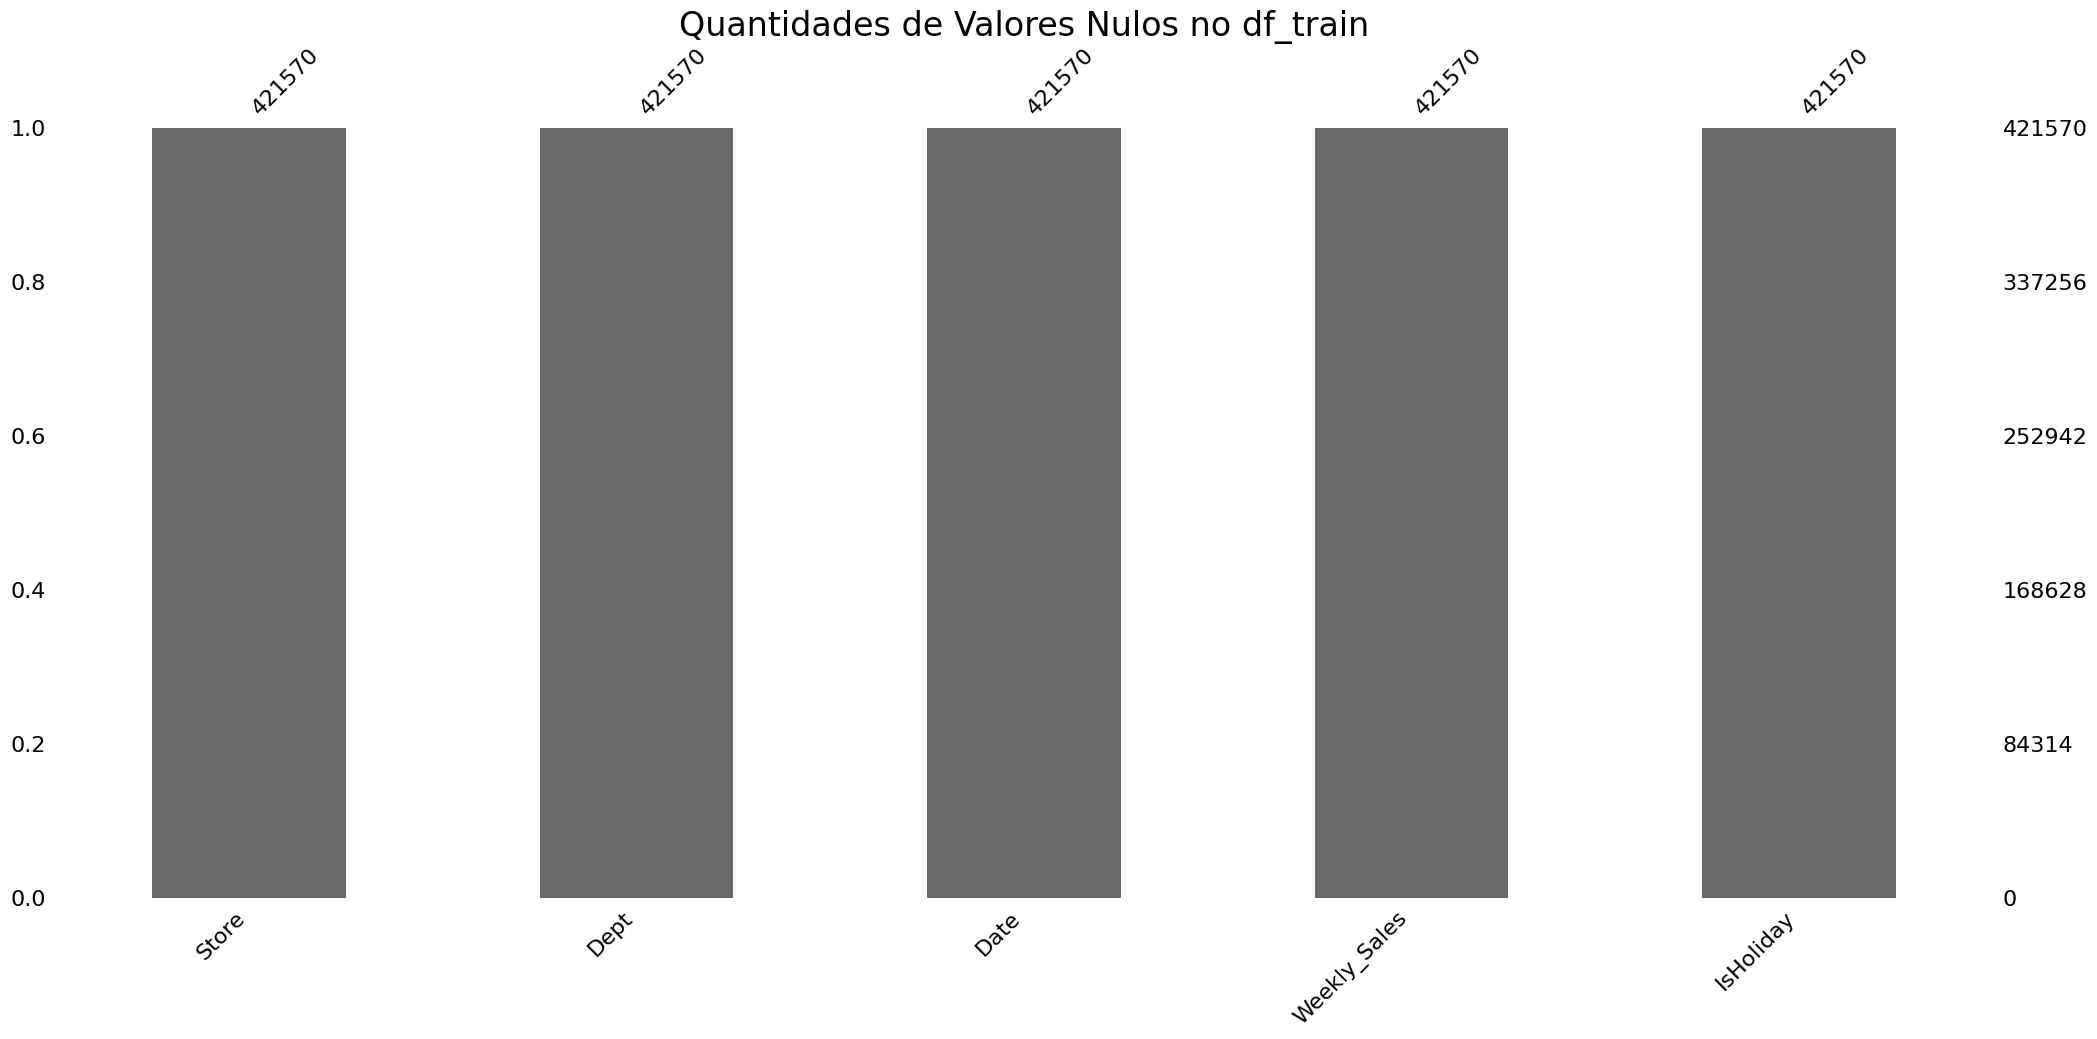

In [19]:
msno.bar(df_train)
plt.title('Quantidades de Valores Nulos no df_train', fontsize=24)
plt.savefig(f'{path_img}Valores_Nulos_df-train.png', dpi=300, bbox_inches='tight')
plt.show()

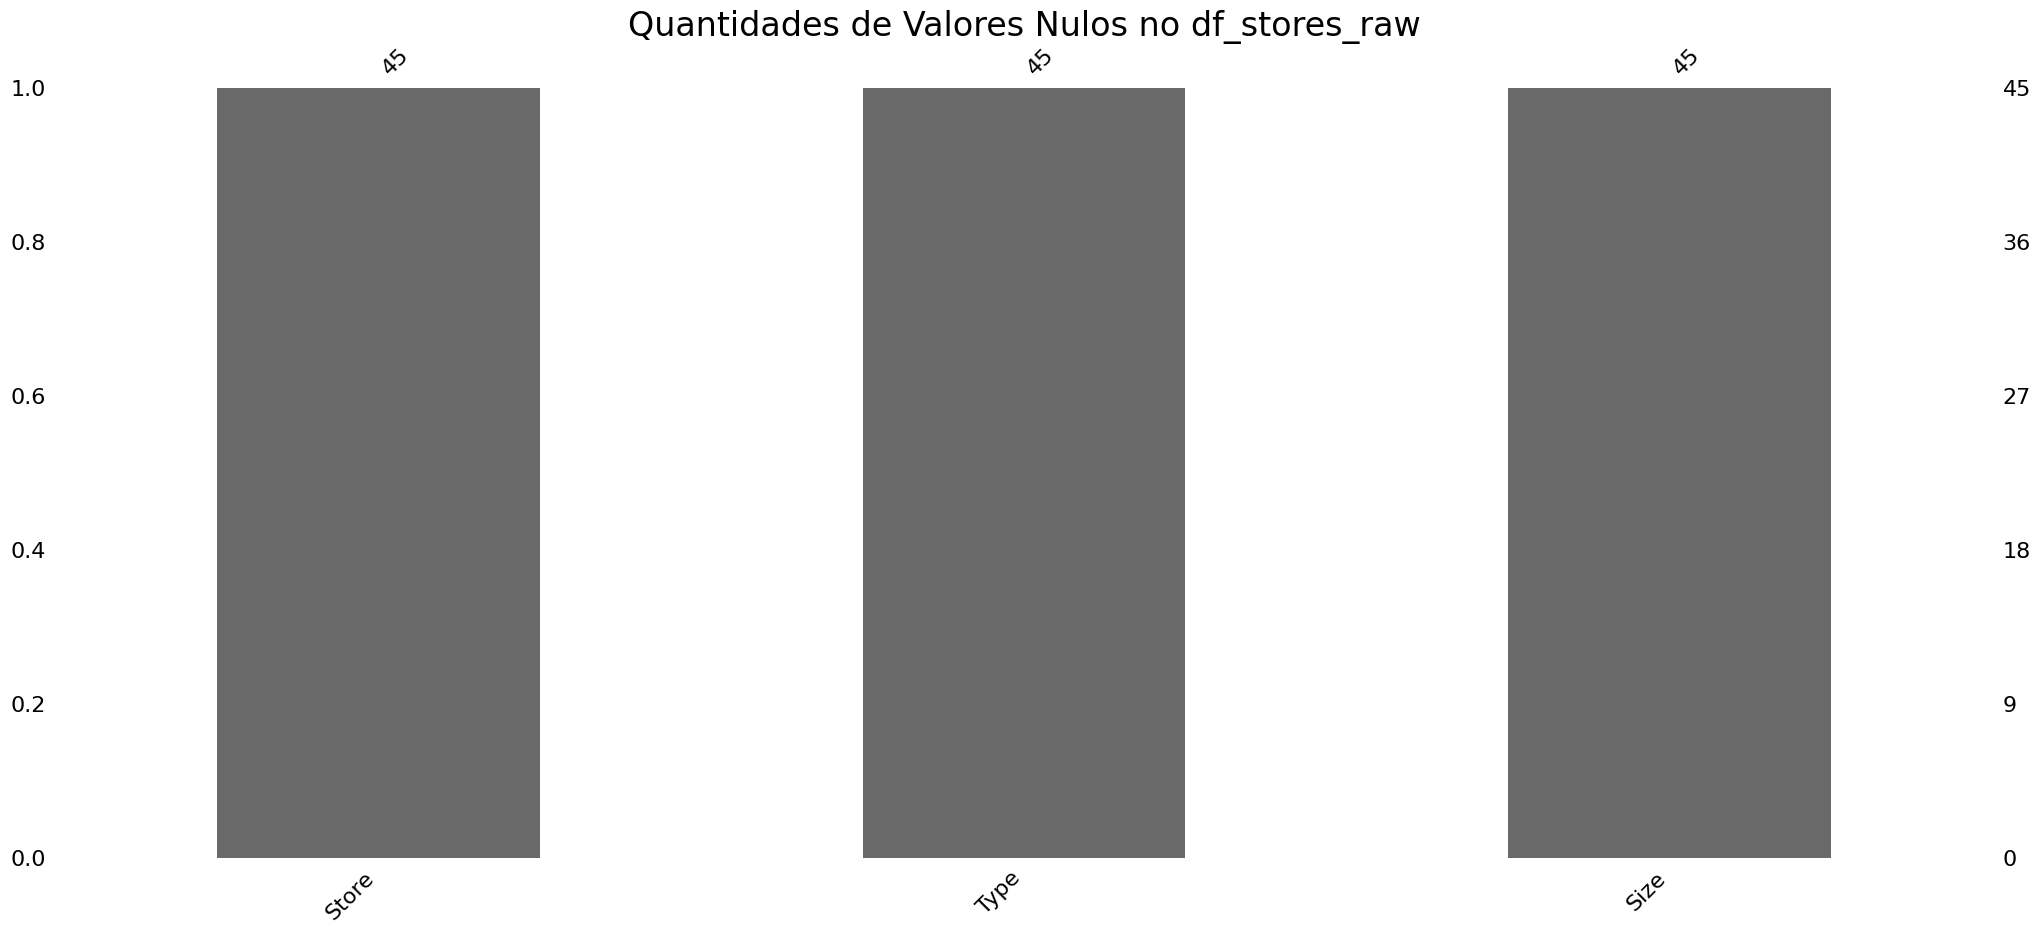

In [20]:
msno.bar(df_stores_raw)
plt.title('Quantidades de Valores Nulos no df_stores_raw', fontsize=24)
plt.savefig(f'{path_img}Valores_Nulos_df-stores.png', dpi=300, bbox_inches='tight')
plt.show()

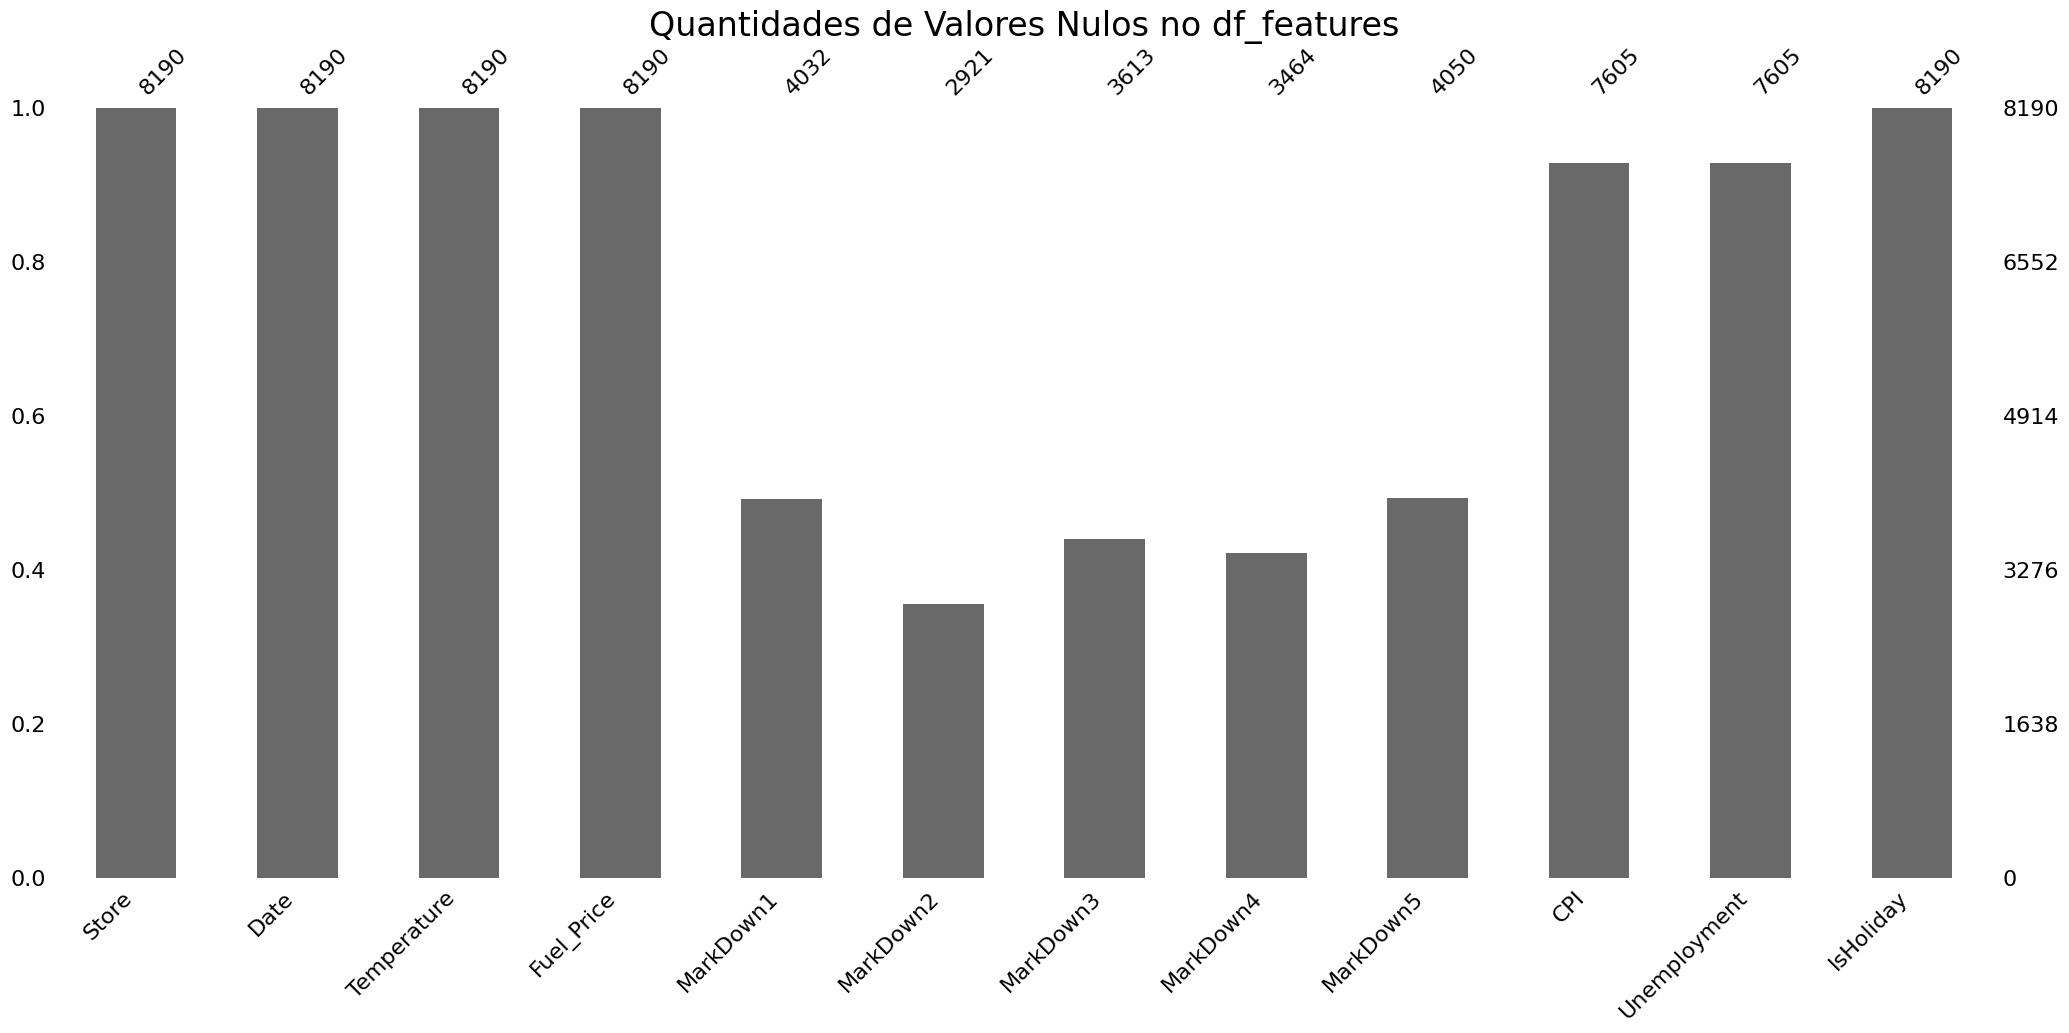

In [21]:
msno.bar(df_features)
plt.title('Quantidades de Valores Nulos no df_features', fontsize=24)
plt.savefig(f'{path_img}Valores_Nulos_df-features.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Percentual de Valores Nulos

missing_summary = pd.DataFrame({
    'missing_count': df_features.isna().sum(),
    'missing_percent': (df_features.isna().sum() / len(df_features) * 100).round(2)
})
print(missing_summary)

              missing_count  missing_percent
Store                     0             0.00
Date                      0             0.00
Temperature               0             0.00
Fuel_Price                0             0.00
MarkDown1              4158            50.77
MarkDown2              5269            64.33
MarkDown3              4577            55.89
MarkDown4              4726            57.70
MarkDown5              4140            50.55
CPI                     585             7.14
Unemployment            585             7.14
IsHoliday                 0             0.00


### Verificando Valores Duplicados nos Datasets

In [23]:
df_train.duplicated(subset=['Store', 'Dept', 'Date']).sum()

np.int64(0)

In [24]:
df_features.duplicated(subset=['Store', 'Date']).sum()

np.int64(0)

In [25]:
df_stores_raw.duplicated(subset=['Store']).sum()

np.int64(0)

### Aplicando Merge nos Datasets

In [26]:
df = (
    df_train
        .merge(df_features, on=['Store', 'Date'], how='left')
        .merge(df_stores_raw, on='Store', how='left')
)

In [27]:
# Localizando Valores Não Casados

df[df['Temperature'].isna()][['Store', 'Date']].head()

,Store,Date


In [28]:
# Valores Duplicados Após o Merge

df.duplicated().sum()

np.int64(0)

In [29]:
# Garantindo que Não Houve o Aumento de Linhas Após o Merge

len(df), len(df_train)

(421570, 421570)

In [30]:
# Verificando se os "IsHoliday" se Diferem

(df['IsHoliday_x'] != df['IsHoliday_y']).sum()


np.int64(0)

In [31]:
# Valores Nulos Após o Merge

df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

Confirmando que as chaves de junção entre os arquivos são consistentes. Essa verificação é importante para evitar erros silenciosos no merge e na criação de variáveis temporais.

### Estatística Descritiva

In [32]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,150681.0,7246.420196,0.27,2240.27,5347.45,9210.9,88646.76,8291.221345
MarkDown2,111248.0,3334.628621,-265.76,41.6,192.0,1926.94,104519.54,9475.357325
MarkDown3,137091.0,1439.421384,-29.1,5.08,24.6,103.99,141630.61,9623.07829
MarkDown4,134967.0,3383.168256,0.22,504.22,1481.31,3595.04,67474.85,6292.384031


In [33]:
df['Weekly_Sales'].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

### Análise Temporal

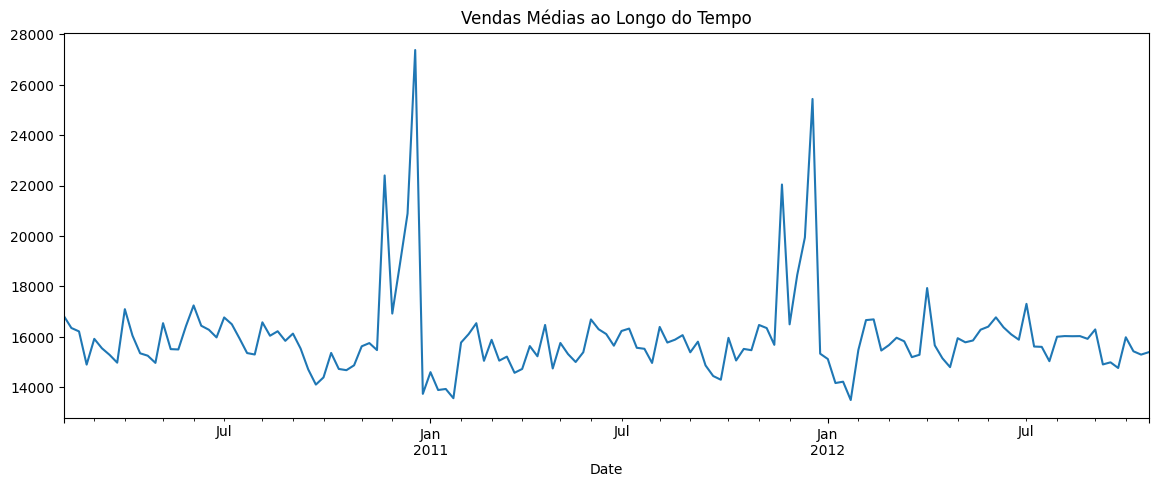

In [34]:
sales_over_time = (
    df.groupby('Date')['Weekly_Sales']
    .mean()
)

sales_over_time.plot(figsize=(14,5))
plt.title('Vendas Médias ao Longo do Tempo')
plt.savefig(f'{path_img}Vendas_Medias_Tempo.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
# Ordenando o Dataframe pela Data

df.sort_values('Date', inplace=True)

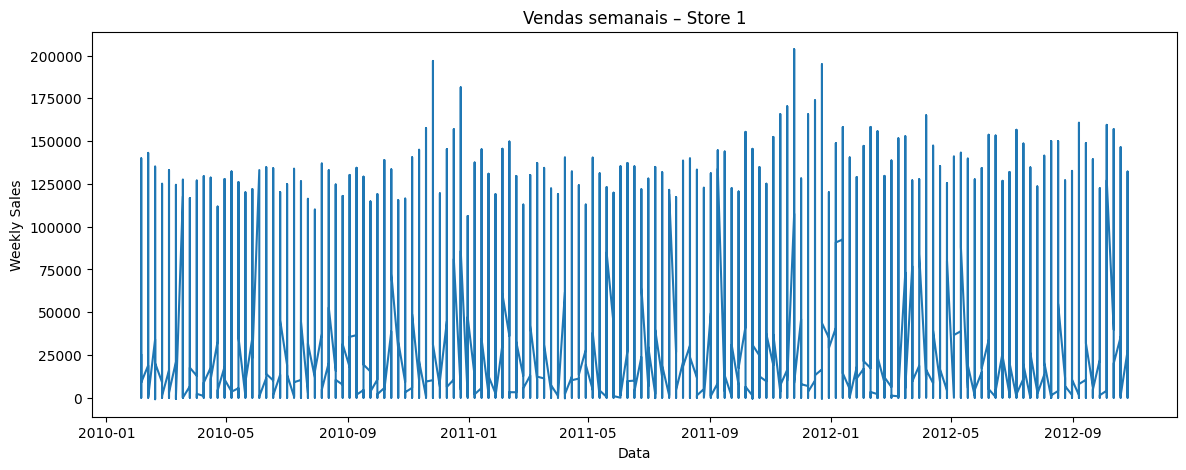

In [36]:
# Vendas por Loja

store_id = 1

df_temp_store = df[df['Store'] == store_id]

plt.figure(figsize=(14,5))
plt.plot(df_temp_store['Date'], df_temp_store['Weekly_Sales'])
plt.title(f"Vendas semanais – Store {store_id}")
plt.xlabel("Data")
plt.ylabel("Weekly Sales")
plt.savefig(f'{path_img}Vendas_Semanais_Loja_{store_id}.png', dpi=300, bbox_inches='tight')
plt.show()

As estatísticas descritivas mostram uma grande dispersão nas vendas semanais, com valores máximos muito elevados em relação à mediana. Isso sugere uma distribuição assimétrica, o que pode violar a suposição de normalidade da regressão linear clássica. Esse comportamento indica que transformações na variável alvo ou o uso de modelos mais robustos devem ser considerados.

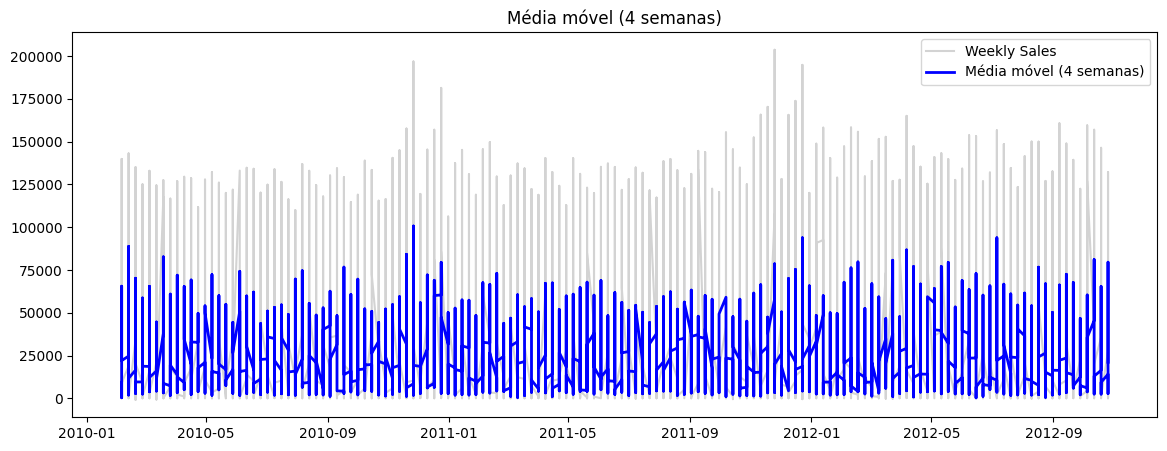

In [37]:
# Média Móvel de 4 Semanas

df_temp_store = df_temp_store.set_index('Date')

df_temp_store['rolling_4w'] = (
    df_temp_store['Weekly_Sales']
    .rolling(window=4)
    .mean()
)

plt.figure(figsize=(14,5))
plt.plot(df_temp_store.index, df_temp_store['Weekly_Sales'], 
         label='Weekly Sales', color='lightgray')
plt.plot(df_temp_store.index, df_temp_store['rolling_4w'], 
         label='Média móvel (4 semanas)', color='blue', linewidth=2)
plt.title('Média móvel (4 semanas)')
plt.legend()
plt.savefig(f'{path_img}Media_Movel_4_Semanas.png', dpi=300, bbox_inches='tight')
plt.show()

A série temporal das vendas médias semanais evidencia padrões de tendência e flutuações recorrentes ao longo do tempo. Esse comportamento indica dependência temporal, o que limita a capacidade de modelos lineares simples em capturar toda a dinâmica dos dados.

In [38]:
# Sazonalidade Semanal

df['WeekofYear'] = df['Date'].dt.isocalendar().week

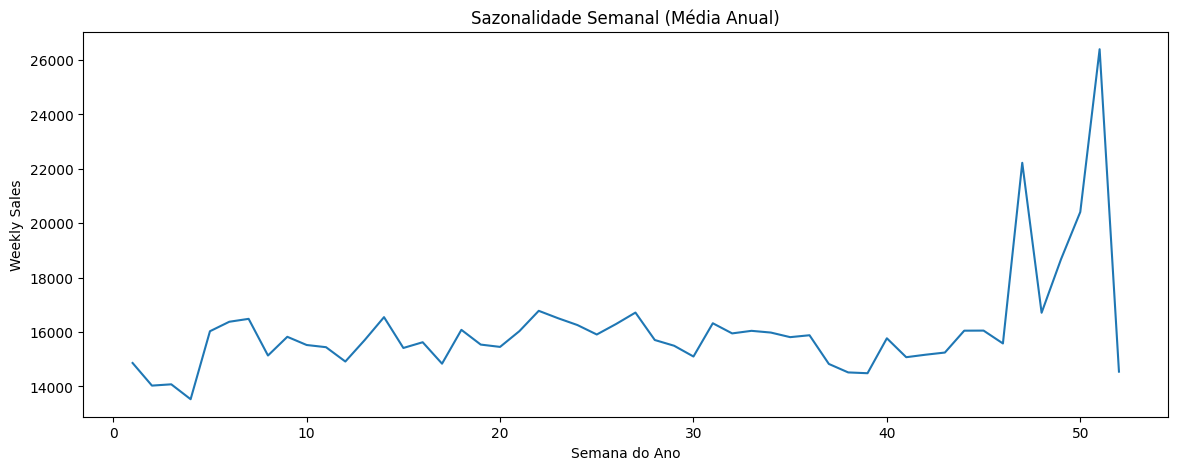

In [39]:
weekly_seasonality = (
    df.groupby('WeekofYear')['Weekly_Sales']
    .mean()
)

weekly_seasonality.plot(figsize=(14,5))
plt.title('Sazonalidade Semanal (Média Anual)')
plt.xlabel('Semana do Ano')
plt.ylabel('Weekly Sales')
plt.savefig(f'{path_img}Sazonalidade_Semanal_Media_Anual.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
# Efeito do Feriado vs Não Feriado

df.groupby('IsHoliday_x')['Weekly_Sales'].mean()

IsHoliday_x
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

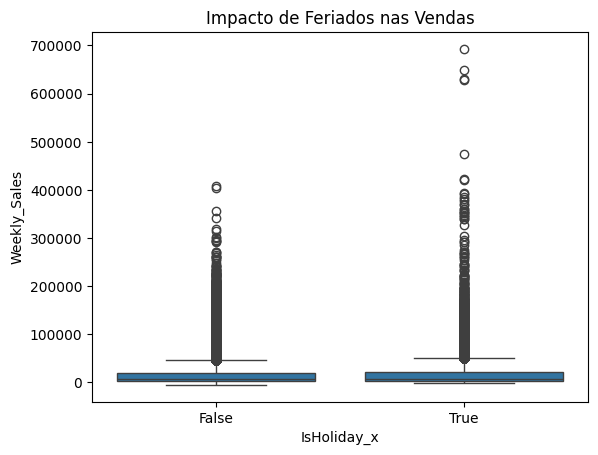

In [41]:
sns.boxplot(x='IsHoliday_x', y='Weekly_Sales', data=df)
plt.title('Impacto de Feriados nas Vendas')
plt.savefig(f'{path_img}Impacto_Feriado_Vendas.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
# Identificação de Picos em Feriados Nacionais

top_weeks = (
    df.groupby('Date')['Weekly_Sales']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_weeks

Date
2010-12-24    27378.692693
2011-12-23    25437.146122
2010-11-26    22403.336705
2011-11-25    22043.563476
2010-12-17    20892.463619
2011-12-16    19942.149333
2010-12-10    18882.893619
2011-12-09    18458.853056
2012-04-06    17935.741157
2012-07-06    17309.362337
Name: Weekly_Sales, dtype: float64

In [43]:
# Verificando se são Feriados

df[df['Date'].isin(top_weeks.index)][['Date', 'IsHoliday_x', 'Weekly_Sales']].sort_values('Weekly_Sales', ascending=False)

,Date,IsHoliday_x,Weekly_Sales
95373,2010-11-26,True,693099.36
338013,2011-11-25,True,649770.18
95425,2011-11-25,True,630999.19
337961,2010-11-26,True,627962.93
135665,2010-11-26,True,474330.10
...,...,...,...
402333,2010-12-17,False,-372.90
84513,2010-12-10,False,-496.00
6062,2011-12-23,False,-498.00
113832,2011-12-16,False,-498.00


As vendas em semanas com feriados apresentam, em média, valores mais elevados e maior variabilidade quando comparadas às semanas sem feriados. Isso indica que feriados não apenas aumentam o nível médio de vendas, mas também tornam o comportamento mais volátil.

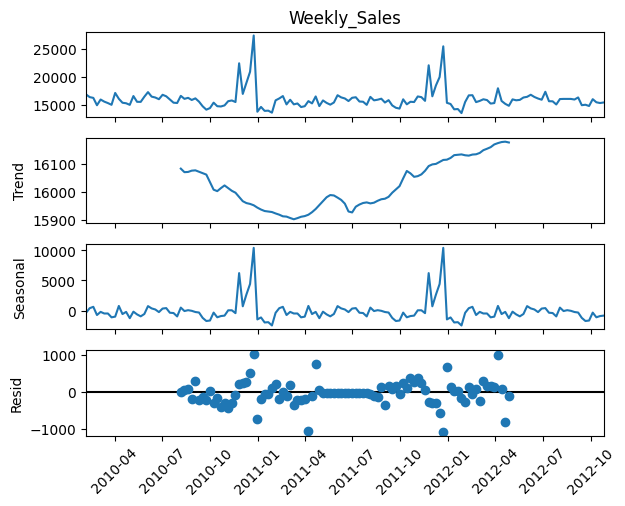

In [44]:
ts = (
    df.groupby('Date')['Weekly_Sales']
    .mean()
)

decomposition = seasonal_decompose(ts, model='additive', period=52)
decomposition.plot()
plt.xticks(rotation=45)
plt.savefig(f'{path_img}Decomposicao.png', dpi=300, bbox_inches='tight')
plt.show()

A decomposição sazonal confirma a presença de uma componente sazonal anual bem definida, além de uma tendência de longo prazo. Esse resultado reforça a necessidade de incluir variáveis temporais explícitas ou empregar modelos capazes de capturar sazonalidade de forma direta.

### Outliers

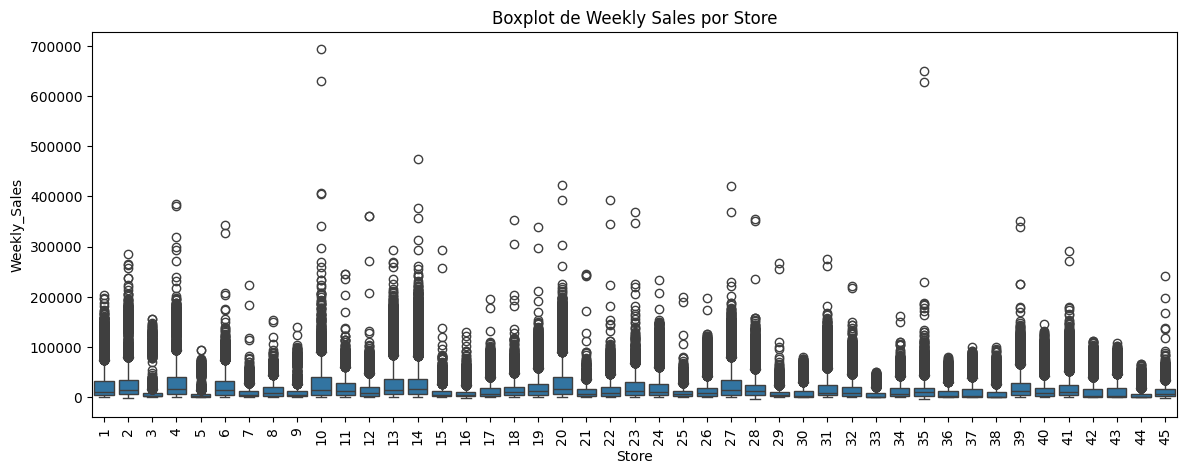

In [45]:
# Boxplot por Loja

plt.figure(figsize=(14,5))
sns.boxplot(
    x='Store',
    y='Weekly_Sales',
    data=df,
    showfliers=True
)
plt.title('Boxplot de Weekly Sales por Store')
plt.xticks(rotation=90)
plt.savefig(f'{path_img}Boxplot_Week_Vendas_por_Loja.png', dpi=300, bbox_inches='tight')
plt.show()

A análise por loja revela uma heterogeneidade significativa no volume de vendas, indicando que o comportamento não é homogêneo entre unidades. Isso sugere a presença de efeitos específicos de loja, que devem ser considerados explicitamente no modelo por meio de variáveis categóricas ou interações.

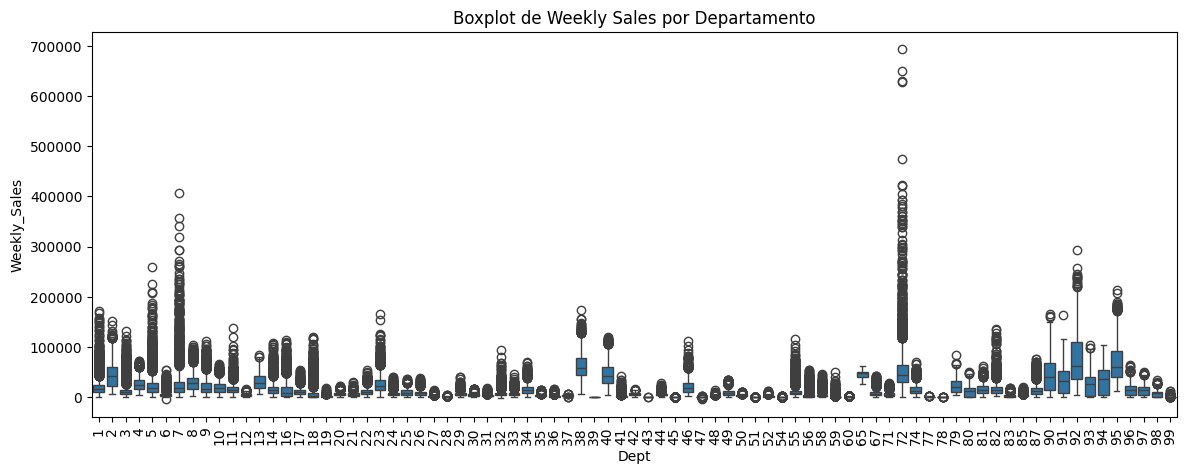

In [46]:
# Boxplot por Departamento

plt.figure(figsize=(14,5))
sns.boxplot(
    x='Dept',
    y='Weekly_Sales',
    data=df,
    showfliers=True
)
plt.title('Boxplot de Weekly Sales por Departamento')
plt.xticks(rotation=90)
plt.savefig(f'{path_img}Boxplot_Vendas_Semanais_Departamento.png', dpi=300, bbox_inches='tight')
plt.show()

Assim como observado para as lojas, os departamentos apresentam padrões de venda bastante distintos. Alguns concentram volumes muito maiores, o que contribui para o aumento da variância global das vendas e reforça a necessidade de modelar esse efeito explicitamente.

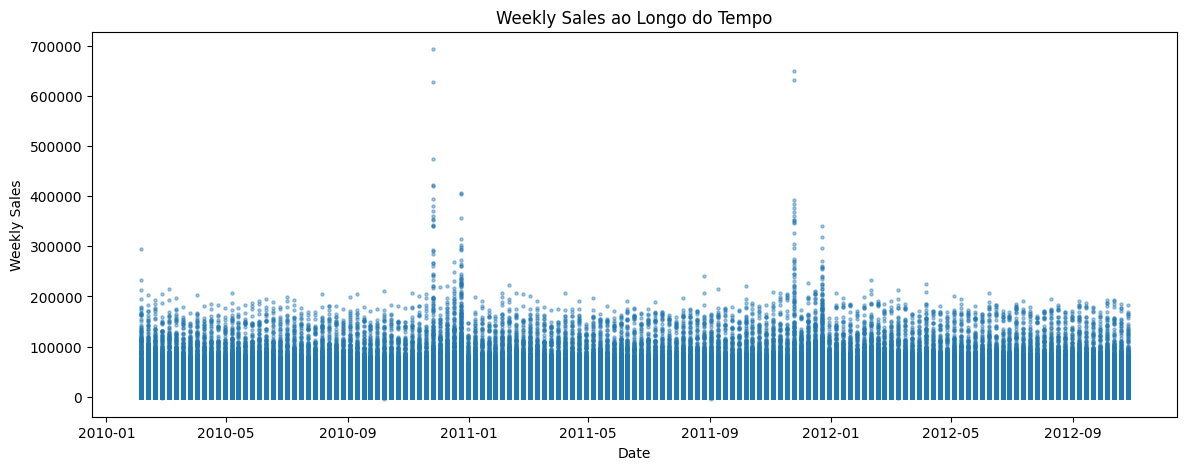

In [47]:
# Outliers ao Longo do Tempo

plt.figure(figsize=(14,5))
plt.scatter(df['Date'], df['Weekly_Sales'], s=5, alpha=0.4)
plt.title('Weekly Sales ao Longo do Tempo')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.savefig(f'{path_img}Vendas_Semanais_Tempo.png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
# Detecção IQR

Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = df[
    (df['Weekly_Sales'] < lower) |
    (df['Weekly_Sales'] > upper)
]
outliers_iqr.shape

(35521, 18)

In [49]:
# Detecção Z-score

df['zscore_sales'] = zscore(df['Weekly_Sales'])
outliers_z = df[df['zscore_sales'].abs() > 3]
outliers_z.shape

(8848, 19)

In [50]:
outliers_iqr.groupby('IsHoliday_x')['Weekly_Sales'].count()

IsHoliday_x
False    32903
True      2618
Name: Weekly_Sales, dtype: int64

In [51]:
# Analisando Alguns Outliers Manualmente

outliers_iqr[
    ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x']
].sort_values('Weekly_Sales', ascending=False).head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x
95373,10,72,2010-11-26,693099.36,True
338013,35,72,2011-11-25,649770.18,True
95425,10,72,2011-11-25,630999.19,True
337961,35,72,2010-11-26,627962.93,True
135665,14,72,2010-11-26,474330.10,True
195088,20,72,2010-11-26,422306.25,True
264390,27,72,2010-11-26,420586.57,True
88428,10,7,2010-12-24,406988.63,False
95377,10,72,2010-12-24,404245.03,False
214432,22,72,2010-11-26,393705.20,True


In [52]:
# Outliers por Store individual

def outliers_por_store(df, store_id):
    subset = df[df['Store'] == store_id]
    Q1 = subset['Weekly_Sales'].quantile(0.25)
    Q3 = subset['Weekly_Sales'].quantile(0.75)
    IQR = Q3 - Q1

    return subset[
        (subset['Weekly_Sales'] < Q1 - 1.5*IQR) |
        (subset['Weekly_Sales'] > Q3 + 1.5*IQR)
    ]

outliers_por_store(df, store_id=1).head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,WeekofYear,zscore_sales
7647,1,72,2010-02-05,98499.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,3.633362
5118,1,38,2010-02-05,115564.35,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,4.384765
8941,1,90,2010-02-05,76419.47,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,2.661168
9227,1,92,2010-02-05,139884.94,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,5.455631
9656,1,95,2010-02-05,106690.06,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,3.994019


### Correlação

In [53]:
# Selecionado as Variáveis Numéricas

num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'zscore_sales'],
      dtype='object')

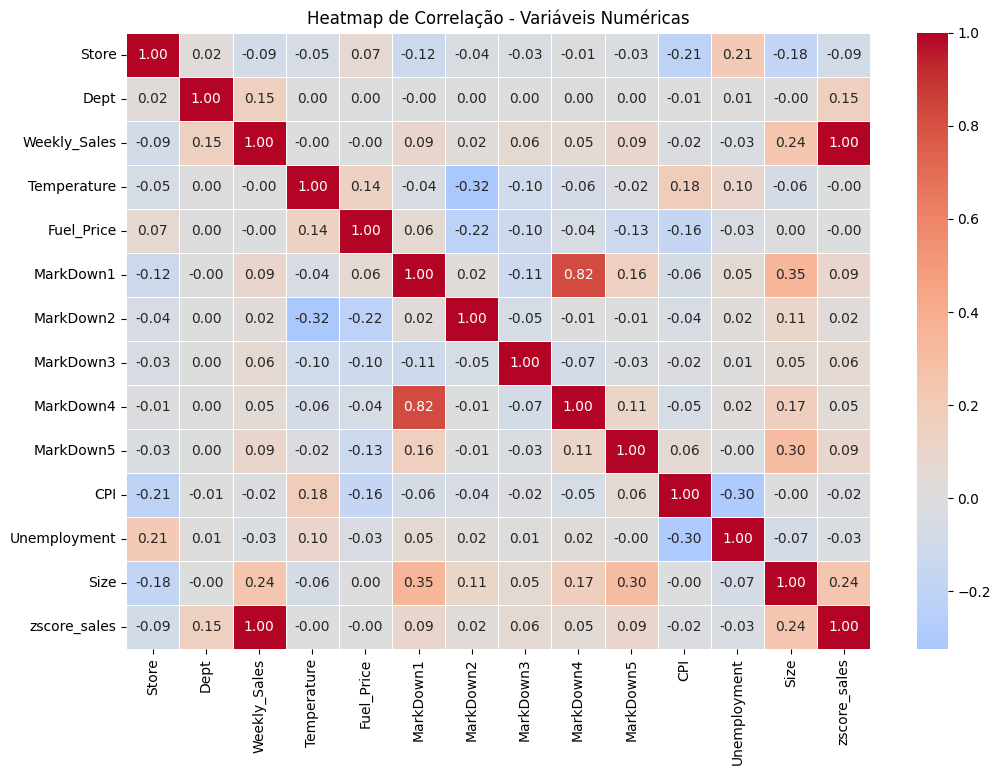

In [54]:
# Matriz de Correlação

corr_matrix = num_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    annot=True,
    fmt='.2f',
    annot_kws={'size':10}
)
plt.title('Heatmap de Correlação - Variáveis Numéricas')
plt.savefig(f'{path_img}Mapa_de_Calor.png', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
corr_target = (
    corr_matrix['Weekly_Sales']
    .sort_values(ascending=False)
)
corr_target

Weekly_Sales    1.000000
zscore_sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

A análise de correlação mostra que muitas variáveis apresentam baixa correlação linear individual com as vendas, além de evidenciar relações fortes entre algumas variáveis explicativas. Isso sugere a presença de multicolinearidade e indica que correlação simples pode não ser suficiente para capturar relações mais complexas.

### Testes Estatísticos Preliminares

In [56]:
# Multicolinearidade entre Colunas

features_for_vif = num_df.drop(columns=['Weekly_Sales']).fillna(0)

vif_df = pd.DataFrame()
vif_df['feature'] = features_for_vif.columns
vif_df['VIF'] = [
    variance_inflation_factor(features_for_vif.values, i)
    for i in range(features_for_vif.shape[1])
]
vif_df.sort_values('VIF', ascending=False)

,feature,VIF
3,Fuel_Price,33.034513
10,Unemployment,17.259929
9,CPI,15.585117
2,Temperature,13.446471
11,Size,6.346716
4,MarkDown1,4.738932
0,Store,4.404312
7,MarkDown4,3.735393
1,Dept,3.141127
8,MarkDown5,1.452587


In [57]:
# Teste de Shapiro-Wilk

samples_sales = df['Weekly_Sales'].sample(5000, random_state=42)
shapiro_test = stats.shapiro(samples_sales)
shapiro_test

ShapiroResult(statistic=np.float64(0.6596002882118795), pvalue=np.float64(4.680238516617968e-72))

In [58]:
# Teste de Levene (Homocedasticidade)

sales_holiday = df[df['IsHoliday_x'] == True]['Weekly_Sales']
sales_non_holiday = df[df['IsHoliday_x'] == False]['Weekly_Sales']
levene_test = stats.levene(sales_holiday, sales_non_holiday)
levene_test

LeveneResult(statistic=np.float64(79.7690384736311), pvalue=np.float64(4.2246645954759797e-19))

In [59]:
# Teste t

t_test = stats.ttest_ind(
    sales_holiday,
    sales_non_holiday,
    equal_var=False
)
t_test

TtestResult(statistic=np.float64(7.000740275222608), pvalue=np.float64(2.595125026573969e-12), df=np.float64(32751.623666529573))

In [60]:
# Anova

sample_df = df[['Store', 'Weekly_Sales']].sample(10000, random_state=42)
anova_test = stats.f_oneway(
    *[
        sample_df[sample_df['Store'] == store]['Weekly_Sales']
        for store in sample_df['Store'].unique()
    ]
)
anova_test

F_onewayResult(statistic=np.float64(24.198136115948806), pvalue=np.float64(9.991542815088022e-184))

Os testes estatísticos foram utilizados aqui apenas como diagnóstico preliminar para avaliar normalidade e homocedasticidade. Os resultados indicam possíveis violações dessas suposições, que serão analisadas de forma mais rigorosa na etapa de inferência estatística.

### Correlação Colunas Markdown com as Vendas (Weekly Sales)

In [61]:
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
df[['Weekly_Sales'] + markdown_cols].corr()['Weekly_Sales'].sort_values(ascending=False)


Weekly_Sales    1.000000
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
Name: Weekly_Sales, dtype: float64